# VIRTUAL INTERNSHIP EXPERIENCE - KPMG
---

## Project 1 - Data Quality Assessment
📑 **Objective:**
- Preliminary data exploration and identify ways to improve the quality of Sprocket Central Pty Ltd’s data.
- The 3 datasets attached from Sprocket Central Pty Ltd:
    - Customer Demographic 
    - Customer Addresses
    - Transaction data in the past three months

### Standard Data Quality Dimension

In [1]:
from IPython.display import Image

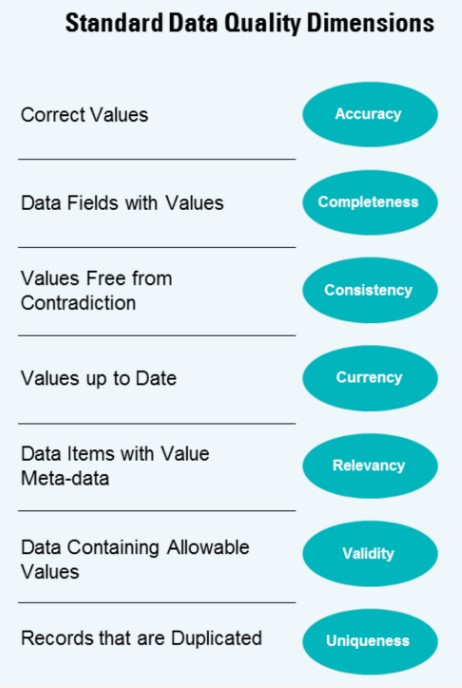

In [2]:
# Display the framework for data quality assessment
Image(filename = "Data Quality Framework.jpg", width = 250, height = 350)

In [13]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## **Customer Address**
---

### **1. Data Cleaning**

**1.1 Checking Missing Values (Data Completness)** 

In [144]:
# Load customer address dataset
address = pd.read_csv('CustomerAddress.csv')
pd.set_option("display.max_columns", 20)
address.head(10)

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9
5,7,4 Delaware Trail,2210,New South Wales,Australia,9
6,8,49 Londonderry Lane,2650,New South Wales,Australia,4
7,9,97736 7th Trail,2023,New South Wales,Australia,12
8,11,93405 Ludington Park,3044,VIC,Australia,8
9,12,44339 Golden Leaf Alley,4557,QLD,Australia,4


In [145]:
address.iloc[100:110]

,customer_id,address,postcode,state,country,property_valuation
100,105,8611 Loomis Lane,2155,New South Wales,Australia,10
101,106,7909 Pierstorff Crossing,2517,New South Wales,Australia,9
102,107,01 Muir Parkway,2096,New South Wales,Australia,12
103,108,0410 Division Junction,2750,New South Wales,Australia,8
104,109,41 Service Lane,2217,New South Wales,Australia,11
105,110,5 Moose Road,3977,VIC,Australia,8
106,111,7342 Fieldstone Junction,2093,New South Wales,Australia,12
107,112,0 David Terrace,3204,VIC,Australia,11
108,113,15239 Northwestern Point,4300,QLD,Australia,4
109,114,60 Oneill Street,2170,New South Wales,Australia,9


In [146]:
address.tail(10)

,customer_id,address,postcode,state,country,property_valuation
3989,3994,2918 Summer Ridge Hill,3030,VIC,Australia,2
3990,3995,613 Erie Lane,2088,NSW,Australia,12
3991,3996,0 Transport Center,3977,VIC,Australia,6
3992,3997,4 Dovetail Crossing,2350,NSW,Australia,2
3993,3998,736 Roxbury Junction,2540,NSW,Australia,6
3994,3999,1482 Hauk Trail,3064,VIC,Australia,3
3995,4000,57042 Village Green Point,4511,QLD,Australia,6
3996,4001,87 Crescent Oaks Alley,2756,NSW,Australia,10
3997,4002,8194 Lien Street,4032,QLD,Australia,7
3998,4003,320 Acker Drive,2251,NSW,Australia,7


In [147]:
address.shape

(3999, 6)

In [148]:
address.isna().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

🔎 **Observation:**
There is **no missing values** for this dataset, it means the data is complete

**1.2 Checking Inconsistent Records (Data Consistency)**

In [3]:
# Checking unique value for each columns
for col in address.columns:
    print("{} have {} unique values: {}".format(col, address[col].nunique(), address[col].dtypes))
    if address[col].dtypes == 'int64' or address[col].dtypes == 'float' or address[col].dtypes == 'object':
        print("{} values: {}".format(col,address[col].unique()))
        print('')

customer_id have 3999 unique values: int64
customer_id values: [   1    2    4 ... 4001 4002 4003]

address have 3996 unique values: object
address values: ['060 Morning Avenue' '6 Meadow Vale Court' '0 Holy Cross Court' ...
 '87 Crescent Oaks Alley' '8194 Lien Street' '320 Acker Drive']

postcode have 873 unique values: int64
postcode values: [2016 2153 4211 2448 3216 2210 2650 2023 3044 4557 3799 2760 2428 3331
 3058 2135 2233 2444 4413 4740 3218 4868 4116 2519 2756 2170 4005 4127
 2535 4726 4805 2212 2207 3350 3931 4018 4670 2480 3212 2322 3198 2047
 4503 2145 4350 2142 2029 2127 4280 2166 2046 2026 2765 2749 2745 3752
 2217 2230 3046 3183 2070 2213 4208 2774 4133 4213 4170 2073 3561 2330
 3977 2204 2086 2226 2075 2038 2069 2100 3133 3070 2777 2125 2766 2209
 2160 2065 2150 2168 4171 2155 2517 2096 2750 2093 3204 4300 3844 4226
 3192 2485 2097 4817 2516 3074 4508 4405 2452 2205 4132 4744 2158 3201
 4178 2112 2033 4401 3186 4017 2315 2285 2219 4509 2759 2747 2227 2025
 3191 3025 2263

In [149]:
# Checking the state columns
address['state'].unique()

array(['New South Wales', 'QLD', 'VIC', 'NSW', 'Victoria'], dtype=object)

🔎 **Observation:**
- The data type of each columns is already correct.
- The records in **state** column is **not consistent** (New Sout Wales = NSQ ; Victoria = VIC).

🔽 **`State`**

In [150]:
# Check the total records of each unique values
address['state'].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [151]:
# Replace the incorrect values
address['state'].replace(['New South Wales','Victoria'],['NSW','VIC'], inplace=True)
address['state'].value_counts()

NSW    2140
VIC    1021
QLD     838
Name: state, dtype: int64

📝 **Result:**
New South Wales and Victoria has been updated to NSW and VIC

📝 **Recommendation:**
- The records in state column has only 3 records.
- In order to avoid data inconsistency, **dropdown list** could be an options when the data customer address is gathered. 

**1.3 Detect the duplicated values (Data Uniqueness)**

In [29]:
address.duplicated().sum()

0

🔎 **Observation:**
There is **no duplicate records** in this dataset.

**1.4 Checking the correctness of data (Data Accuracy/Clarity)**

In [152]:
# Check the property valuation column
address['property_valuation'].head(10)

0    10
1    10
2     9
3     4
4     9
5     9
6     4
7    12
8     8
9     4
Name: property_valuation, dtype: int64

🔎 **Observation:**
- The records might be correct values filled by the customer.
- This data are **lacks of clarity.** We don't know what this number means.

📝 **Recommendation:**
- **Set only the integer number** that is allowed to be filled by the customer.
- The **column name could be change** or make it clear wheather the valuations in Trilliun, or billion, or another else

### **2. Exploratory Data Analysis**

**2.1 General Data Information**

In [153]:
# Display data sample
address.sample(10)

,customer_id,address,postcode,state,country,property_valuation
288,293,00 5th Lane,2830,NSW,Australia,2
676,681,76 Hanson Junction,2147,NSW,Australia,9
2265,2270,38 Valley Edge Plaza,3095,VIC,Australia,10
1378,1383,6 La Follette Lane,3977,VIC,Australia,6
1122,1127,1879 Mitchell Center,2206,NSW,Australia,10
3187,3192,2 Gateway Drive,3995,VIC,Australia,2
3492,3497,96 Delladonna Trail,3976,VIC,Australia,5
3805,3810,73 Debra Terrace,2141,NSW,Australia,7
1650,1655,22 Badeau Avenue,3161,VIC,Australia,11
3930,3935,3 Kedzie Center,3106,VIC,Australia,10


In [154]:
# Size of dataset
address.shape

(3999, 6)

In [155]:
# Checking the dataset information
address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [156]:
# Numerical data
nums_data = address.loc[:,(address.dtypes == 'int64')|(address.dtypes == 'float64')].columns.tolist()
print(nums_data)
print('Count of Numeric Data: ', len(nums_data))

['customer_id', 'postcode', 'property_valuation']
Count of Numeric Data:  3


In [157]:
# Categorical Data
cat_data = address.loc[:,address.dtypes == object].columns.tolist()
print(cat_data)
print('Count of categorical data: ',len(cat_data))

['address', 'state', 'country']
Count of categorical data:  3


🔎 **Observation:**
- Customer Address dataset contains **3999 rows** and **6 columns**.
- There are **3 numerical data** which data types is integer and **3 categorical** data with data types is string or objects.

**2.2 Statistical Summary**

In [158]:
# Check the statistical descriptive of both categorical and numerical columns
# Numerical columns
address[nums_data].describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,3999.0,2003.987997,1154.576912,1.0,1004.5,2004.0,3003.5,4003.0
postcode,3999.0,2985.755939,844.878364,2000.0,2200.0,2768.0,3750.0,4883.0
property_valuation,3999.0,7.514379,2.824663,1.0,6.0,8.0,10.0,12.0


In [159]:
# Categorical columns
address[cat_data].describe().T

,count,unique,top,freq
address,3999,3996,3 Mariners Cove Terrace,2
state,3999,3,NSW,2140
country,3999,1,Australia,3999


**2.4 Data Understanding**

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

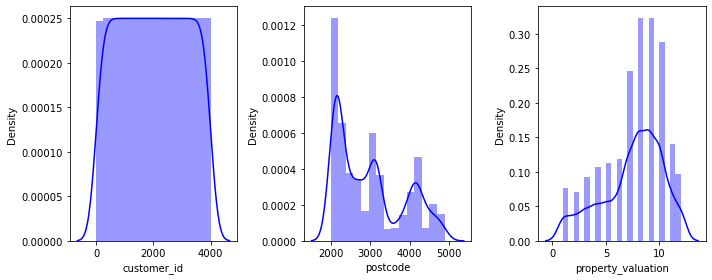

In [160]:
# Distributions of numerical data
plt.figure(figsize=(10,4))
for i in range(0,len(nums_data)):
    plt.subplot(1, len(nums_data), i+1)
    sns.distplot(address[nums_data[i]], color='blue')
    plt.tight_layout()

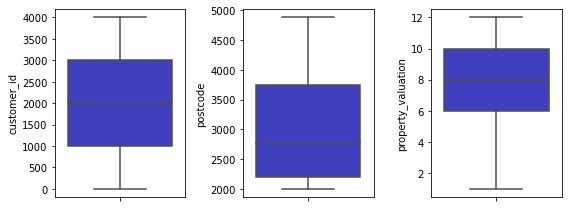

In [162]:
# Check the outliers of numerical data
plt.figure(figsize=(8,3))
for i in range(0, len(nums_data)):
    plt.subplot(1, len(nums_data), i+1)
    sns.boxplot(y=address[nums_data[i]], color='blue' ,orient='v', saturation=0.5)
    plt.tight_layout()

🔎 **Observation:**
- Type of distribution for property_valuation is **left-skewed** or **negatively-skewed**. In other words, more values concentrated on the right-tail.
- Central measure tendency of left-skewed is **mode > median > mean**
- From boxplot, there are **no outliers** in this dataset

### 3. Save Clean Dataset

In [163]:
# save clean dataset to csv file
address.to_csv('CustomerAddress_Clean.csv', index=False)

## **Customer Demographic**
---

### 1. **Data Cleaning**

**1.1 Checking and Removing Irrelevant Columns (Data Relevancy)**

In [4]:
# Load the dataset
demo = pd.read_csv('CustomerDemographic.csv', encoding='latin-1')
pd.set_option("display.max_columns", 20)
demo.sample(7)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
3295,3819,Alvan,Phillput,Male,62,6/29/1978,Staff Accountant I,NaN,High Net Worth,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,2264,Tony,Shirley,Female,18,7/17/1972,Occupational Therapist,Health,Affluent Customer,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1135,1312,Magda,Baugh,Female,96,7/16/1994,Food Chemist,Health,Affluent Customer,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3060,3495,Constantine,Frissell,Female,57,7/12/1987,Programmer III,Financial Services,High Net Worth,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
644,740,Farr,Butterick,Male,9,8/18/1994,NaN,Financial Services,Affluent Customer,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2701,3096,Lulu,Cabane,Female,32,6/28/1973,Associate Professor,Financial Services,Mass Customer,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2223,2519,Ryon,Dalliston,Male,76,10/17/1979,Senior Developer,Manufacturing,Mass Customer,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Make a copy of the dataset
demo2 = demo.copy()
demo2.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30',
       'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34',
       'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38',
       'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42',
       'Unnamed: 43', 'Unnamed: 44'],
      dtype='object')

In [6]:
drop_column = ['Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30',
       'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34',
       'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38',
       'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42',
       'Unnamed: 43', 'Unnamed: 44']
print('Column with unnamed:',len(drop_column))

Column with unnamed: 32


In [7]:
# Drop irrelevant columns
demo2.drop(columns=drop_column, inplace=True)
demo2.drop(columns='default', inplace=True)
demo2.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure'],
      dtype='object')

🔎 **Observation:**
- There are **32 unnamed** columns with nothing informations that can be extracted into insights.
- The **default** column **is not relevant** and **contains no informations** at all.

**1.2 Detect missing values (Data Completeness)**

In [81]:
# Check the column with missing values
total_miss_val = demo2.isna().sum().sort_values(ascending=False)
percent = round(demo2.isna().sum()*100/demo1.shape[0],2).sort_values(ascending=False)
missing_columns = pd.concat([total_miss_val,percent], axis=1, keys=['total_missing','percent_missing (%)'])
missing_columns

,total_missing,percent_missing (%)
job_industry_category,553,16.08
job_title,437,12.71
DOB,72,2.09
tenure,72,2.09
customer_id,0,0.00
first_name,0,0.00
last_name,0,0.00
gender,0,0.00
past_3_years_bike_related_purchases,0,0.00
wealth_segment,0,0.00


🔽 **`last_name`**
> It assumes that missng values in last_name column is simply because the person does not have last name. So, the missing will be **filling by the first name.**

In [9]:
demo2['last_name'].fillna(demo2['first_name'], inplace=True)

🔽 **`job_title` & `job_industry_category`**

In [10]:
demo2['job_title'].value_counts()

Social Worker                           39
Business Systems Development Analyst    39
Tax Accountant                          37
Legal Assistant                         37
Internal Auditor                        37
                                        ..
Database Administrator I                 3
Research Assistant I                     3
Health Coach I                           2
Staff Accountant I                       2
Research Assistant III                   1
Name: job_title, Length: 194, dtype: int64

In [11]:
demo2['job_industry_category'].value_counts()

Manufacturing         686
Financial Services    677
Health                530
Retail                305
Property              230
IT                    188
Entertainment         112
Argiculture            94
Telecommunications     64
Name: job_industry_category, dtype: int64

In [12]:
fill_job = ['job_title','job_industry_category']
for col in fill_job:
    demo2[col].fillna(method='pad', inplace=True)

🔽 **`Tenure`**
> The tenure will be filling with the **previous values of tenure**

In [13]:
demo2['tenure'].fillna(method='pad', inplace=True)

🔽 **`DOB`**
> The DOB NaN will be filling with the **previous values.**

In [14]:
demo2['DOB'].fillna(method='pad', inplace=True)

In [16]:
total_miss_val = demo2.isna().sum().sort_values(ascending=False)
percent = round(demo2.isna().sum()*100/demo2.shape[0],2).sort_values(ascending=False)
missing_columns = pd.concat([total_miss_val,percent], axis=1, keys=['total_missing','percent_missing (%)'])
missing_columns

,total_missing,percent_missing (%)
customer_id,0,0.0
first_name,0,0.0
last_name,0,0.0
gender,0,0.0
past_3_years_bike_related_purchases,0,0.0
DOB,0,0.0
job_title,0,0.0
job_industry_category,0,0.0
wealth_segment,0,0.0
deceased_indicator,0,0.0


🔎 **Observation:**
- Columns that has a missing values are **job_industry_category, job_title, last_name, DOB, tenure.**
- For last_name, missng values happen because the person does not have last_name, so it **filled with the first_name.**
- For DOB, tenure, job_industry_category, and job_title, the missing value **filled by the previous records.**

**1.3 Duplicate Values (Data Uniqueness)**

In [17]:
demo2.duplicated().sum()

0

🔎 **Observation:**
There is no data duplications in Customer Demographic dataset

**1.4 Check the data type and inconsisten value (Data Consistency)**

In [18]:
# Sample data
demo2.sample(5)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
1632,1895,Leese,Lohan,Female,53,9/2/1975,Technical Writer,Manufacturing,Mass Customer,N,No,15
1049,1189,Mart,Bazoche,Male,22,8/29/1988,Geologist I,Health,High Net Worth,N,Yes,8
2704,3099,Shelli,Benitti,Female,73,11/26/1996,Dental Hygienist,Retail,Mass Customer,N,Yes,3
677,782,Bevvy,Siegertsz,Female,30,8/29/1976,Geological Engineer,Manufacturing,Mass Customer,N,No,17
3019,3435,Stevena,Allcock,Female,80,1/15/2002,Senior Editor,Health,Affluent Customer,N,No,1


In [19]:
# Checking the data type
demo2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3439 entries, 0 to 3438
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   customer_id                          3439 non-null   int64 
 1   first_name                           3439 non-null   object
 2   last_name                            3439 non-null   object
 3   gender                               3439 non-null   object
 4   past_3_years_bike_related_purchases  3439 non-null   int64 
 5   DOB                                  3439 non-null   object
 6   job_title                            3439 non-null   object
 7   job_industry_category                3439 non-null   object
 8   wealth_segment                       3439 non-null   object
 9   deceased_indicator                   3439 non-null   object
 10  owns_car                             3439 non-null   object
 11  tenure                               3439 n

In [23]:
# Checking unique values for each columns
for col in demo2.columns:
    print('{} have {} unique values: {}'.format(col, demo2[col].nunique(), demo2[col].dtypes))
    print('{} column: {} \n'.format(col,demo2[col].unique()))

customer_id have 3439 unique values: int64
customer_id column: [   1   27   28 ... 3998 3999 4000] 

first_name have 2792 unique values: object
first_name column: ['Laraine' 'Garvin' 'Fee' ... 'Stephie' 'Rusty' 'Sarene'] 

last_name have 3325 unique values: object
last_name column: ['Medendorp' 'Klees' 'Zellmer' ... 'Woolley' 'Patrizius' 'Oldland'] 

gender have 6 unique values: object
gender column: ['F' 'Male' 'Female' 'U' 'Femal' 'M'] 

past_3_years_bike_related_purchases have 100 unique values: int64
past_3_years_bike_related_purchases column: [93 37  5 62 18  3 17 44 59 40 33 46 91 64 24 38 63 98 51 68 57 22  2 48
 87 26 60 47 58 73 21 67 16 78 30 94 28 20 79 76 11 97  1 75 41 74 69 19
 80 83 49 25 54  4 23 65 88 10 77 43  9 82 85 27 53 81 32 12 34 71  6 36
 90 99 55 61 95  8 39  7 42 45 56 50 13 14 89 84 96 70 31 66  0 15 86 72
 35 92 29 52] 

DOB have 3003 unique values: object
DOB column: ['10/12/1953' '9/25/1978' '9/30/1973' ... '12/12/1975' '7/13/2001'
 '11/5/1991'] 

job_tit

🔎 **Observation:**
- There are some columns with **wrong data types** and **inconsisten values** inside of it.
- **Gender column** contains inconsistent values. It suppose to be **Male or Female**.
- **DOB column** get wrong data type. It written in object or string. Instead, it must be **datetime**. This column can be **converted into the age or age_class** so that it will be easier when it comes to analyze the data.
- **owns_car column** consists **wrong records** and **inconsisten records**. It is suggessted to be **boolean** data type
- **tenure column** consists **wrong records** and **inconsisten records**. Tenure column should be **integer**.

🔽 **`Gender`**
> The records is not consistent. The records must contain **male or female** only. 'F' must be Female, 'M' must be Male, 'Femal' must be Female. For U, we need to check the person.

In [29]:
# Replace 'M' dan 'F' respectively to 'Male' and 'Female'
demo3 = demo2.copy()
demo3['gender'].replace(['M','F'],['Male','Female'],inplace=True)
demo3['gender'].replace('Femal','Female',inplace=True)

In [38]:
# Check the gender U
demo3['gender'][(demo3['gender'] == 'U')].value_counts()

U    73
Name: gender, dtype: int64

In [40]:
# Replace U with female
demo3['gender'].replace('U', 'Female', inplace=True)

In [43]:
# Checking values
demo3['gender'].value_counts()

Female    1822
Male      1617
Name: gender, dtype: int64

🔽 **`DOB`**
> We are going to change the data type of DOB from object (str) to datetime. Wrong data type will lead to problems in further analysis.

In [44]:
demo3['DOB'] = demo3['DOB'].astype('datetime64[ns]')

In [47]:
# Calculate the age of each person
from datetime import date
def cal_age(birthdate):
    today = date.today()
    age = today.year - birthdate.year - ((today.month, today.day) < (birthdate.month, birthdate.day))
    return age
demo3['age'] = demo3['DOB'].apply(cal_age)

🔽 **`deceased_indicator`**
> Change the 'Y' and 'N' to 'Yes' or 'No'. 'Yes' records means the person has already passed away. We are not going to include those people. We just **concern on people who still alive**.

In [49]:
# Replace values
demo3['deceased_indicator'].replace(['Y','N'],['Yes','No'], inplace= True)

In [52]:
# check the 'Yes', and remove it from dataset
demo3[(demo3['deceased_indicator'] == 'Yes')]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
657,753,Josy,St. Quentin,Female,82,1970-03-07,Food Chemist,Health,Affluent Customer,Yes,Yes,6,53
3266,3790,Kurtis,Morson,Male,91,1959-05-31,Senior Editor,Retail,Mass Customer,Yes,Yes,9,63


In [53]:
# drop all rows
demo3.drop([657,3266], inplace=True)
demo3['deceased_indicator'].unique()

array(['No'], dtype=object)

In [54]:
# The person are all alive. We could drop deceased_indicator column
demo3.drop('deceased_indicator', axis=1, inplace=True)
demo3.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'owns_car', 'tenure', 'age'],
      dtype='object')

🔽 **`owns_car`**
> We replace the owns_car with **'Yes'** value if the age is **more than 30 years old**. Otherwise, we set **'No'** values

In [68]:
demo3[(demo3['owns_car'] != 'Yes') & (demo3['owns_car'] != 'No')]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,age
383,410,Alicia,Townend,Female,14,1990-04-09,Structural Engineer,Health,Mass Customer,_,"*)""",32
387,461,Jsandye,Melendez,Female,19,1979-10-09,Social Worker,Health,Mass Customer,"ãã»:*:ã»ãâ( â» Ï â» )ãã»:*:ã»ãâ""",No,43
507,587,Adolphus,Seers,Male,43,1966-05-27,Registered Nurse,Health,Mass Customer,×Ö¼Ö¸×¨Ö¸× ×Ö±×Ö¹×Ö´××,×Öµ×ª ×Ö·×©Ö¼×Ö¸×Ö·×Ö´×,56
508,601,Ken,Renfree,Male,56,1992-12-04,Senior Quality Engineer,Retail,High Net Worth,Ø¬Ø²ÙØ±ØªÙ Ø¨Ø§Ø³ØªØ®Ø¯Ø§Ù Ø£Ù Ø¯ÙÙ. Ø¥Ø° ÙÙØ...,"ÙØ°ÙØ± Ø""",30
832,937,Nikolos,McKyrrelly,Male,65,1985-11-15,Human Resources Assistant IV,Manufacturing,Affluent Customer,"ãã»:*:ã»ãâ( â» Ï â» )ãã»:*:ã»ãâ""",Yes,37
1103,1243,Robbert,Blakey,Male,73,1953-08-09,Research Assistant II,Retail,Mass Customer,_,"*)""",69
1254,1431,Derek,Malafe,Male,29,1975-05-13,Sales Associate,Financial Services,Affluent Customer,_,"*)""",47
1280,1466,Cyndia,Gull,Female,62,1998-01-05,Cost Accountant,Financial Services,High Net Worth,×Ö¼Ö¸×¨Ö¸× ×Ö±×Ö¹×Ö´××,×Öµ×ª ×Ö·×©Ö¼×Ö¸×Ö·×Ö´×,25
1585,1805,Venus,Sketch,Female,90,1976-10-15,Budget/Accounting Analyst II,Financial Services,Mass Customer,Ø¬Ø²ÙØ±ØªÙ Ø¨Ø§Ø³ØªØ®Ø¯Ø§Ù Ø£Ù Ø¯ÙÙ. Ø¥Ø° ÙÙØ...,"ÙØ°ÙØ± Ø""",46
1588,1847,Bobinette,Stanaway,Female,68,1978-02-04,Executive Secretary,Manufacturing,Mass Customer,"./;'[]\-=""",No,45


In [83]:
# Change the owns_car with yes for people whose age is more than 30
have_car = demo3['owns_car'][(demo3['owns_car'] != 'Yes') & (demo3['owns_car'] != 'No') & (demo3['age'] > 30)].tolist()

# Change the owns_car with No for people whose age is less than 30
dont_have_car = demo3['owns_car'][(demo3['owns_car'] != 'Yes') & (demo3['owns_car'] != 'No') & (demo3['age'] < 30)].tolist()

In [84]:
demo3.replace(have_car, 'Yes', inplace=True)

In [85]:
demo3.replace(dont_have_car, 'No', inplace=True)

In [86]:
# Check unique values
demo3['owns_car'].unique()

array(['Yes', 'No'], dtype=object)

In [87]:
# Check the value
demo3[(demo3['owns_car'] != 'Yes') & (demo3['owns_car'] != 'No')]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,age


🔽 **`tenure`**
> We change the data type of tenure into the **integer** and change some records which is not the relevant or acurate values.

In [89]:
# change the inaccurate records or irrelevant records
demo3['tenure'].unique()

array(['16', '12', '21', '19', '6', '14', '4', '11', '20', '22', '18',
       '5', '17', '8', '15', '2', '1', '13', '7', '3', '10', '9', '*)"',
       'No', ' ×Öµ×ª ×Ö·×©Ö¼×Ö¸×Ö·×Ö´×', ' ÙØ°ÙØ± Ø"', 'Yes'],
      dtype=object)

In [91]:
not_int = ['*)"',
       'No', ' ×Öµ×ª ×Ö·×©Ö¼×Ö¸×Ö·×Ö´×', ' ÙØ°ÙØ± Ø"', 'Yes']
# replace the not_int records with 5
demo3.replace(not_int, '5', inplace=True)
demo3['tenure'].unique()

array(['16', '12', '21', '19', '6', '14', '4', '11', '20', '22', '18',
       '5', '17', '8', '15', '2', '1', '13', '7', '3', '10', '9'],
      dtype=object)

In [105]:
demo3['tenure']= demo3['tenure'].astype('int64')

In [106]:
demo3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3437 entries, 0 to 3438
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3437 non-null   int64         
 1   first_name                           3437 non-null   object        
 2   last_name                            3437 non-null   object        
 3   gender                               3437 non-null   object        
 4   past_3_years_bike_related_purchases  3437 non-null   int64         
 5   DOB                                  3437 non-null   datetime64[ns]
 6   job_title                            3437 non-null   object        
 7   job_industry_category                3437 non-null   object        
 8   wealth_segment                       3437 non-null   object        
 9   owns_car                             3437 non-null   object        
 10  tenure      

### 2. **Exploratory Data Analysis**

**2.1 General Information**

In [107]:
# dataset info
demo3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3437 entries, 0 to 3438
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3437 non-null   int64         
 1   first_name                           3437 non-null   object        
 2   last_name                            3437 non-null   object        
 3   gender                               3437 non-null   object        
 4   past_3_years_bike_related_purchases  3437 non-null   int64         
 5   DOB                                  3437 non-null   datetime64[ns]
 6   job_title                            3437 non-null   object        
 7   job_industry_category                3437 non-null   object        
 8   wealth_segment                       3437 non-null   object        
 9   owns_car                             3437 non-null   object        
 10  tenure      

In [110]:
# Numerical data
nums_data_demo = demo3.loc[:,(demo3.dtypes == 'int64') | (demo3.dtypes == float)].columns.tolist()
print(nums_data_demo)
print('Counts of data: ', len(nums_data_demo))

['customer_id', 'past_3_years_bike_related_purchases', 'tenure', 'age']
Counts of data:  4


In [111]:
# Categorical data
cat_data_demo = demo3.loc[:,(demo3.dtypes == object)].columns.tolist()
print(cat_data_demo)
print('Counts of data: ',len(cat_data_demo))

['first_name', 'last_name', 'gender', 'job_title', 'job_industry_category', 'wealth_segment', 'owns_car']
Counts of data:  7


**2.2 Statistical Summary**

In [115]:
stat_num_col = demo3[nums_data_demo].describe().T
print('Statistical data for numerical columns:\n',stat_num_col)

stat_cat_col = demo3[cat_data_demo].describe().T
print('\nStatistical data for categorical columns:\n',stat_cat_col)

Statistical data for numerical columns:
                                       count         mean          std   min  \
customer_id                          3437.0  1968.588595  1137.272088   1.0   
past_3_years_bike_related_purchases  3437.0    48.879255    28.715906   0.0   
tenure                               3437.0    10.626418     5.627099   1.0   
age                                  3437.0    45.242363    12.777048  21.0   

                                        25%     50%     75%     max  
customer_id                          1000.0  1982.0  2950.0  4000.0  
past_3_years_bike_related_purchases    24.0    48.0    73.0    99.0  
tenure                                  6.0    10.0    15.0    22.0  
age                                    36.0    45.0    55.0   179.0  

Statistical data for categorical columns:
                       count unique                                   top  freq
first_name             3437   2792                                   Max     5
last_name  

**2.3 Data Distribution**

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

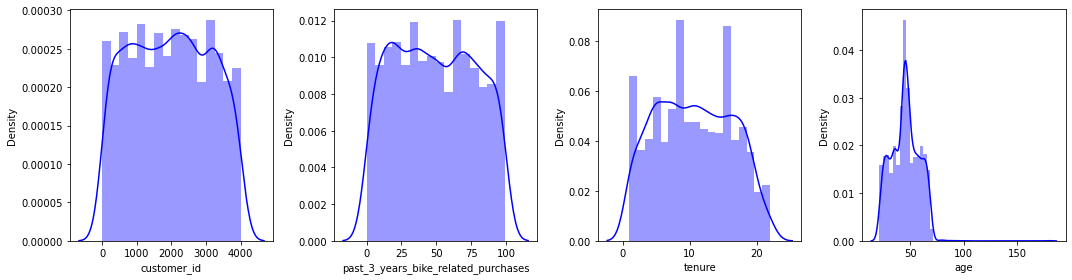

In [118]:
# numerical data distribution
plt.figure(figsize=(15, 4))
for i in range(0, len(nums_data_demo)):
    plt.subplot(1, len(nums_data_demo), i+1)
    sns.distplot(demo3[nums_data_demo[i]], color='blue')
    plt.tight_layout()

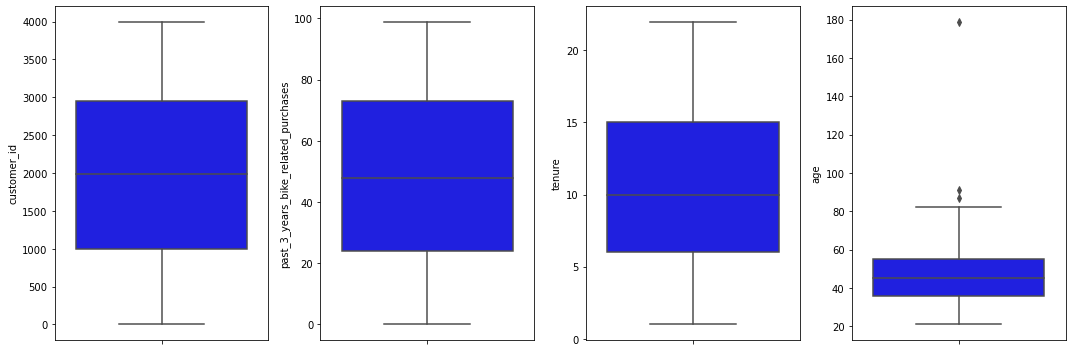

In [124]:
# distribution numerical data and check outlier
plt.figure(figsize=(15, 5))
for i in range(0, len(nums_data_demo)):
    plt.subplot(1, len(nums_data_demo), i+1)
    sns.boxplot(y=demo3[nums_data_demo[i]], color='blue', orient='v')
    plt.tight_layout()

**Outliers treament for age column**
- **Z-Score Method**

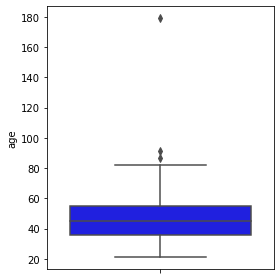

In [131]:
plt.figure(figsize=(4,4))
sns.boxplot(y=demo3['age'], color='blue')
plt.tight_layout()

In [130]:
demo3['age'].describe()

count    3437.000000
mean       45.242363
std        12.777048
min        21.000000
25%        36.000000
50%        45.000000
75%        55.000000
max       179.000000
Name: age, dtype: float64

In [132]:
upper_limit = demo3['age'].mean()+3*demo3['age'].std()
lower_limit = demo3['age'].mean()-3*demo3['age'].std()
print('upper limit for age column: {}'.format(upper_limit))
print('lower limit for age column: {}'.format(lower_limit))

upper limit for age column: 83.57350504241197
lower limit for age column: 6.911220008504536


In [134]:
age_outliers = demo3[(demo3['age'] < lower_limit) | (demo3['age'] > upper_limit)]
age_outliers

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,age
8,34,Jephthah,Bachmann,Female,59,1843-12-21,Legal Assistant,IT,Affluent Customer,5,20,179
624,720,Darrel,Canet,Male,67,1931-10-23,Recruiting Manager,Retail,Affluent Customer,5,6,91
952,1092,Katlin,Creddon,Female,56,1935-08-22,VP Quality Control,Retail,Mass Customer,5,5,87


In [135]:
demo_clean = demo3.loc[(demo3['age'] <= upper_limit) | (demo3['age'] >= lower_limit)]
demo_clean

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,age
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,5,16,69
1,27,Garvin,Klees,Male,37,1978-09-25,Research Nurse,Health,Mass Customer,5,12,44
2,28,Fee,Zellmer,Male,5,1973-09-30,Senior Quality Engineer,Health,Affluent Customer,5,21,49
3,29,Mona,Sancraft,Female,62,1968-06-22,Safety Technician III,Manufacturing,Mass Customer,5,19,54
4,30,Darrick,Helleckas,Male,18,1961-10-18,Safety Technician III,IT,Affluent Customer,5,6,61
...,...,...,...,...,...,...,...,...,...,...,...,...
3434,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,5,19,47
3435,3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,5,1,21
3436,3998,Sarene,Woolley,Female,60,2001-07-13,Assistant Manager,IT,High Net Worth,5,1,21
3437,3999,Patrizius,Patrizius,Male,11,1973-10-24,Assistant Manager,Manufacturing,Affluent Customer,5,10,49


🔎 **Observation:**
- Here, there are only **3 names** with age more than 80.
- To deal with outliers in this case, we could **trim it from dataset** due to the number of outliers is not much.

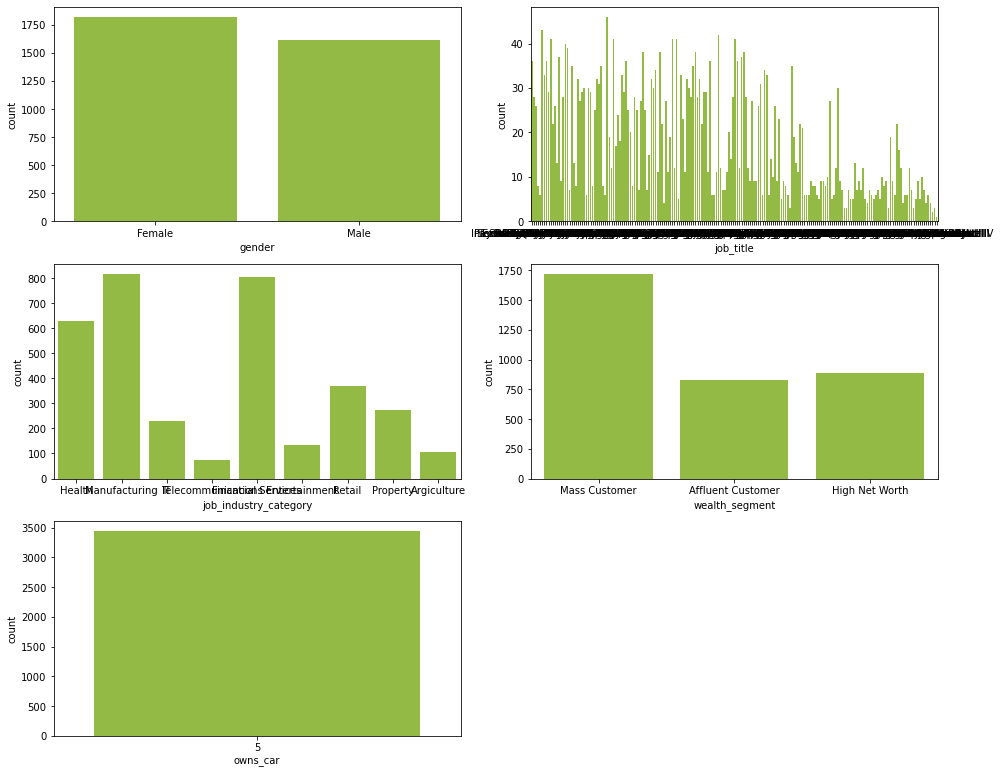

In [142]:
# visualization/countplot categorikal data
cats = ['gender', 'job_title', 'job_industry_category', 'wealth_segment', 'owns_car']
plt.figure(figsize=(14, 14))
for i in range(0, len(cats)):
    plt.subplot(4, 2, i+1)
    sns.countplot(x=demo_clean[cats[i]], color='yellowgreen', orient='v')
    plt.tight_layout()

### 3. Save Clean Dataset

In [143]:
# save dataset
demo_clean.to_csv('CustomerDemographic_Clean.csv', index=False)

## **Transactions**
---

## **1. Data Cleaning**

**1.1 Check duplications (Data Duplication)**

In [4]:
# Load transactions dataset
trans = pd.read_csv('Transactions.csv')
trans.sample(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
5119,5120,55,104,7/14/2017,True,Approved,Trek Bicycles,Road,medium,large,1894.19,$598.76,37823.0
12124,12125,56,2093,1/15/2017,True,Approved,Norco Bicycles,Mountain,low,small,688.63,$612.88,34244.0
15545,15546,68,2198,2/13/2017,NaN,Approved,OHM Cycles,Standard,medium,medium,1636.90,$44.71,38859.0
10871,10872,0,3014,9/7/2017,True,Approved,Giant Bicycles,Standard,medium,large,569.56,$528.43,37874.0
19108,19109,56,2762,7/5/2017,False,Approved,OHM Cycles,Standard,medium,medium,183.86,$137.90,35707.0


In [5]:
# check duplicate
trans.duplicated().any().sum()

0

🔎 **Observation:**
There is **no data duplications** in transactions dataset

**1.2 Handling Missing Values**

In [12]:
# check total missing value and percentage
total_records = trans.shape[0]
total_miss_value = trans.isna().sum().sort_values(ascending=False)
perc_miss_value = round(total_miss_value * 100/total_records, 2)
missing_trans = pd.concat([total_miss_value, perc_miss_value], axis=1, keys=['total missing', 'percentage (%)'])
missing_trans

,total missing,percentage (%)
online_order,360,1.80
brand,197,0.98
product_line,197,0.98
product_class,197,0.98
product_size,197,0.98
standard_cost,197,0.98
product_first_sold_date,197,0.98
transaction_id,0,0.00
product_id,0,0.00
customer_id,0,0.00


🔎 **Observation:**
- There are **7 columns** that has missing values.
- The most columns with missing values is **online_order**. However, it just **1.8% or 360 records**.
- Breakdown for each columns.

🔽 **`online_order`**

In [14]:
# check the missing first
trans[(trans['online_order'].isna() == True)].sample(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
9933,9934,25,2339,7/22/2017,NaN,Approved,Giant Bicycles,Road,medium,medium,1538.99,$829.65,33888.0
10454,10455,64,217,11/6/2017,NaN,Approved,Giant Bicycles,Standard,high,small,1977.36,"$1,759.85",40779.0
5755,5756,42,913,5/31/2017,NaN,Approved,OHM Cycles,Road,medium,small,1810.00,"$1,610.90",39526.0
16519,16520,82,3195,1/24/2017,NaN,Approved,Norco Bicycles,Standard,high,medium,1148.64,$689.18,42226.0
13592,13593,98,2954,8/26/2017,NaN,Approved,Trek Bicycles,Standard,high,medium,358.39,$215.03,38002.0


In [16]:
trans[(trans['online_order'].isna() == False)].sample(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
8876,8877,19,495,1/3/2017,True,Approved,OHM Cycles,Road,high,large,12.01,$7.21,40303.0
19194,19195,45,1550,11/5/2017,False,Approved,Solex,Standard,medium,medium,441.49,$84.99,39427.0
13006,13007,82,28,7/16/2017,False,Approved,Norco Bicycles,Standard,high,medium,1148.64,$689.18,38339.0
18288,18289,52,726,7/27/2017,True,Approved,OHM Cycles,Road,medium,medium,1280.28,$829.51,36145.0
671,672,32,940,5/22/2017,True,Approved,Giant Bicycles,Standard,medium,medium,642.70,$211.37,37337.0


In [17]:
# check the unique values
trans['online_order'].unique()

array([False, True, nan], dtype=object)

In [19]:
# fill the missing with previous value
trans['online_order'].fillna(method='pad', inplace=True)
trans['online_order'].value_counts()

True     10016
False     9984
Name: online_order, dtype: int64

🔽 **`brand, product_line, product_class, product_cost, standard_cost, product_first_sold_date`**
> For this columns, due to the number of rows containing missing values is just 0.8%, we will **remove it** from dataset. To do that, we could perform **trim method** and we save it to **trans1** variable. 

In [36]:
# columns name
miss_col = ['brand', 'product_line', 'product_class', 'product_size', 'standard_cost', 'product_first_sold_date']
for col in miss_col:
    trans1 = trans[(trans[col].isna() == False)]
trans1.sample(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
16563,16564,86,2483,5/12/2017,True,Cancelled,OHM Cycles,Standard,medium,medium,235.63,$125.07,38206.0
1993,1994,4,116,5/15/2017,True,Approved,Giant Bicycles,Standard,high,medium,1129.13,$677.48,33549.0
4461,4462,84,2474,10/27/2017,False,Approved,Giant Bicycles,Road,medium,medium,792.90,$594.68,42105.0
11281,11282,74,3166,1/1/2017,False,Approved,WeareA2B,Standard,medium,medium,1228.07,$400.91,36668.0
16787,16788,34,1621,8/23/2017,False,Approved,Norco Bicycles,Road,high,large,774.53,$464.72,37698.0


In [38]:
# check the missing values
total_records = trans1.shape[0]
total_miss_value = trans1.isna().sum().sort_values(ascending=False)
perc_miss_value = round(total_miss_value * 100/total_records, 2)
missing_trans = pd.concat([total_miss_value, perc_miss_value], axis=1, keys=['total missing', 'percentage (%)'])
missing_trans

,total missing,percentage (%)
transaction_id,0,0.0
product_id,0,0.0
customer_id,0,0.0
transaction_date,0,0.0
online_order,0,0.0
order_status,0,0.0
brand,0,0.0
product_line,0,0.0
product_class,0,0.0
product_size,0,0.0


**1.3 Checking the relevancy and consistency of Data (Data Consistency and Irrelevant Data)**

In [39]:
# check data type
trans1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19803 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           19803 non-null  int64  
 1   product_id               19803 non-null  int64  
 2   customer_id              19803 non-null  int64  
 3   transaction_date         19803 non-null  object 
 4   online_order             19803 non-null  bool   
 5   order_status             19803 non-null  object 
 6   brand                    19803 non-null  object 
 7   product_line             19803 non-null  object 
 8   product_class            19803 non-null  object 
 9   product_size             19803 non-null  object 
 10  list_price               19803 non-null  float64
 11  standard_cost            19803 non-null  object 
 12  product_first_sold_date  19803 non-null  float64
dtypes: bool(1), float64(2), int64(3), object(7)
memory usage: 2.0+ MB


🔎 **Observation:**
- transaction_date must be **datetime** data type, not a string.
- **product_first_sold_date** is **not relevant**. The column said 'date', but the records contain a float number or the price.
- **Standard_cost** is a string data type. It suppose to be **float** number because it tells the prices or cost

🔽 **`transacion_date`**
> Change the data type from object to **datetime64** and change the format to **%Y-%m-%d**

In [73]:
# change the transaction_date data type
from datetime import datetime as dt
trans1['transaction_date'] = trans1['transaction_date'].astype('datetime64[ns]')
trans1['transaction_date'].dt.strftime('%Y-%m-%d')

C:\Users\user\AppData\Local\Temp\ipykernel_15428\3260389243.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trans1['transaction_date'] = trans1['transaction_date'].astype('datetime64[ns]')


0        2017-02-25
1        2017-05-21
2        2017-10-16
3        2017-08-31
4        2017-10-01
            ...    
19995    2017-06-24
19996    2017-11-09
19997    2017-04-14
19998    2017-07-03
19999    2017-09-22
Name: transaction_date, Length: 19803, dtype: object

🔽 **`product_first_sold_date`**

In [87]:
# unix time values to datetime
trans1['product_first_sold_date'] = pd.to_datetime(trans['product_first_sold_date'], unit='d')

C:\Users\user\AppData\Local\Temp\ipykernel_15428\770628157.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trans1['product_first_sold_date'] = pd.to_datetime(trans['product_first_sold_date'], unit='d')


In [88]:
trans1.sample(4)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
5518,5519,39,354,2017-08-23,True,Approved,Giant Bicycles,Standard,medium,large,1812.75,582.48,2080-06-08
13512,13513,13,1127,2017-03-25,False,Approved,Solex,Standard,medium,medium,1163.89,589.27,2086-07-11
168,169,97,456,2017-05-02,False,Approved,Solex,Standard,medium,large,202.62,151.96,2074-01-17
15746,15747,31,506,2017-08-04,False,Approved,Giant Bicycles,Standard,medium,medium,230.91,173.18,2076-11-11


In [69]:
# change name of column
trans1.rename(columns={'product_first_sold':'product_first_sold_date'}, inplace=True)
trans1.columns

C:\Users\user\AppData\Local\Temp\ipykernel_15428\612675791.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trans1.rename(columns={'product_first_sold':'product_first_sold_date'}, inplace=True)


Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

🔽 **`standard_cost`**
> Seperate the $ sign with the number and change the data type to **Float**.

In [71]:
# removing unwanted character in columns
trans1['standard_cost'] = trans1['standard_cost'].str.replace('$','')
trans1['standard_cost'] = trans1['standard_cost'].str.replace(',','')
trans1['standard_cost'].unique()

C:\Users\user\AppData\Local\Temp\ipykernel_15428\3991133144.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  trans1['standard_cost'] = trans1['standard_cost'].str.replace('$','')
C:\Users\user\AppData\Local\Temp\ipykernel_15428\3991133144.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trans1['standard_cost'] = trans1['standard_cost'].str.replace('$','')
C:\Users\user\AppData\Local\Temp\ipykernel_15428\3991133144.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

array(['53.62 ', '388.92 ', '248.82 ', '381.10 ', '709.48 ', '829.65 ',
       '45.26 ', '13.44 ', '380.74 ', '161.60 ', '459.71 ', '56.93 ',
       '154.40 ', '1479.11 ', '818.01 ', '1167.18 ', '388.72 ', '57.74 ',
       '596.55 ', '270.30 ', '513.85 ', '954.82 ', '1531.42 ', '376.84 ',
       '1259.36 ', '1105.75 ', '108.76 ', '675.03 ', '74.51 ', '598.76 ',
       '589.27 ', '649.49 ', '125.07 ', '211.37 ', '795.10 ', '993.66 ',
       '136.73 ', '290.41 ', '75.26 ', '874.90 ', '1759.85 ', '7.21 ',
       '1082.36 ', '677.48 ', '137.90 ', '141.40 ', '131.92 ', '933.84 ',
       '707.40 ', '748.90 ', '594.68 ', '215.14 ', '205.36 ', '298.72 ',
       '614.80 ', '333.18 ', '84.99 ', '400.13 ', '528.43 ', '689.18 ',
       '297.43 ', '762.63 ', '582.48 ', '507.58 ', '215.03 ', '863.95 ',
       '1610.90 ', '1580.47 ', '820.78 ', '101.58 ', '431.45 ',
       '1043.77 ', '230.09 ', '778.69 ', '764.96 ', '260.14 ', '234.43 ',
       '312.74 ', '1234.29 ', '667.40 ', '173.18 ', '612.88 ',

In [98]:
trans1['standard_cost'] = trans1['standard_cost'].astype('float64')

C:\Users\user\AppData\Local\Temp\ipykernel_15428\2630012984.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trans1['standard_cost'] = trans1['standard_cost'].astype('float64')


In [91]:
trans1.sample(4)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
8116,8117,79,1428,2017-03-02,True,Approved,Solex,Touring,medium,large,2083.94,675.03,2083-09-18
10933,10934,33,1553,2017-10-07,False,Approved,OHM Cycles,Road,medium,small,1810.00,1610.90,2078-03-21
4921,4922,55,1563,2017-08-04,True,Approved,Trek Bicycles,Road,medium,large,1894.19,598.76,2073-07-22
16191,16192,39,1300,2017-11-04,True,Approved,Giant Bicycles,Standard,medium,large,1812.75,582.48,2080-06-08


In [99]:
trans1.dtypes

transaction_id                      int64
product_id                          int64
customer_id                         int64
transaction_date           datetime64[ns]
online_order                         bool
order_status                       object
brand                              object
product_line                       object
product_class                      object
product_size                       object
list_price                        float64
standard_cost                     float64
product_first_sold_date    datetime64[ns]
dtype: object

🔽 **`standard_cost`**
> order_status that is cancelled could be eliminated from dataset because it could be assumed that the company **do not get revenue from order that is cancelled**. So, we can just **focus on the transactions that approved**.

In [100]:
trans1[(trans['order_status'] == 'Cancelled')]

C:\Users\user\AppData\Local\Temp\ipykernel_15428\337261936.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  trans1[(trans['order_status'] == 'Cancelled')]


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
42,43,76,488,2017-03-17,False,Cancelled,WeareA2B,Standard,low,medium,642.31,513.85,2084-10-11
138,139,32,2073,2017-03-25,False,Cancelled,Giant Bicycles,Standard,high,medium,1179.00,707.40,2070-11-05
249,250,48,1454,2017-11-25,False,Cancelled,WeareA2B,Standard,medium,medium,1762.96,950.52,2067-02-11
254,255,67,2801,2017-04-01,True,Cancelled,Norco Bicycles,Road,medium,medium,544.05,376.84,2075-10-24
583,584,43,1019,2017-09-13,True,Cancelled,Solex,Standard,medium,medium,1151.96,649.49,2063-04-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19405,19406,79,1860,2017-05-29,False,Cancelled,Norco Bicycles,Standard,medium,medium,1555.58,818.01,2085-08-03
19409,19410,79,1771,2017-01-15,False,Cancelled,Norco Bicycles,Standard,medium,medium,1555.58,818.01,2085-08-11
19822,19823,3,2312,2017-12-02,False,Cancelled,Trek Bicycles,Standard,medium,large,2091.47,388.92,2069-07-21
19957,19958,56,2013,2017-06-04,True,Cancelled,OHM Cycles,Standard,medium,medium,183.86,137.90,2063-07-22


In [101]:
trans1['order_status'].value_counts()

Approved     19625
Cancelled      178
Name: order_status, dtype: int64

We could **trim all rows** that the order_status is cancelled and **drop the order_status column.**

In [103]:
# trim data and get the data only for approved status
trans2 = trans1[(trans1['order_status'] != 'Cancelled')]
trans2.sample(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
6764,6765,37,3492,2017-09-03,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,2069-07-21
14293,14294,28,2075,2017-12-26,False,Approved,Norco Bicycles,Standard,medium,small,1216.14,1082.36,2061-08-06
9526,9527,40,2654,2017-09-11,False,Approved,OHM Cycles,Standard,high,medium,1458.17,874.90,2076-02-04
9443,9444,66,1332,2017-10-03,True,Approved,Giant Bicycles,Road,low,small,590.26,525.33,2085-04-12
11079,11080,50,1603,2017-01-09,True,Approved,WeareA2B,Standard,medium,small,175.89,131.92,2067-02-11


In [105]:
# drop the order_status column
trans2.drop('order_status', axis=1, inplace=True)
trans2.columns

C:\Users\user\AppData\Local\Temp\ipykernel_15428\445644455.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trans2.drop('order_status', axis=1, inplace=True)


Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'brand', 'product_line', 'product_class',
       'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

## Save Clean Data

In [106]:
# save data to new variable
trans_clean = trans2.to_csv('Transactions_Clean.csv', index=False)

**Get data for the latest three months to be analyzed**

In [107]:
# get data and save it to new variable
trans_latest = trans2[(trans2['transaction_date'] >= '2017-10-01') & (trans2['transaction_date'] <= '2017-12-30')]
trans_latest

,transaction_id,product_id,customer_id,transaction_date,online_order,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
2,3,37,402,2017-10-16,False,OHM Cycles,Standard,low,medium,1793.43,248.82,2069-07-21
4,5,78,787,2017-10-01,True,Giant Bicycles,Standard,medium,large,1765.30,709.48,2085-08-11
15,16,3,2961,2017-10-10,False,Trek Bicycles,Standard,medium,large,2091.47,388.92,2073-09-10
20,21,27,1582,2017-10-09,False,Trek Bicycles,Standard,medium,medium,499.53,388.72,2069-06-24
23,24,82,515,2017-10-18,False,Giant Bicycles,Road,medium,medium,1538.99,829.65,2086-02-05
...,...,...,...,...,...,...,...,...,...,...,...,...
19984,19985,31,873,2017-11-15,True,Giant Bicycles,Standard,medium,medium,230.91,173.18,2064-07-13
19985,19986,36,2918,2017-11-09,True,Solex,Standard,low,medium,945.04,507.58,2078-03-21
19986,19987,38,2385,2017-11-01,False,Solex,Standard,medium,medium,1577.53,826.51,2081-03-17
19993,19994,77,2618,2017-12-23,False,Norco Bicycles,Road,medium,large,1240.31,795.10,2081-01-11


In [108]:
# save the latest data
trans_latest.to_csv('Transactions_3months.csv', index=False)